In [1]:
# Importing relevant Libraries
import re # regular expression library; for tokenization of words
from collections import Counter # collections library; counter: dict subclass for counting hashable objects
import matplotlib.pyplot as plt # for data visualization

import re
from collections import Counter
import numpy as np
import pandas as pd


In [3]:
def process_data(file_name):
    """
    Input: 
        A file_name which is found in your current directory. You just have to read it in. 
    Output: 
        words: a list containing all the words in the corpus (text file you read) in lower case. 
    """
    words = [] # return this variable correctly

    #Open the file, read its contents into a string variable
    with open(file_name) as f:
        text = f.read().lower()
    
    #Convert every word to lower case and return them in a list.
    words = re.findall(r'\w+', text)
    
    
    return words

In [12]:
word_l = process_data('./data/shakespeare.txt')
vocab = set(word_l)  # this will be your new vocabulary
print(f"The first ten words in the text are: \n{word_l[0:10]}")

The first ten words in the text are: 
['o', 'for', 'a', 'muse', 'of', 'fire', 'that', 'would', 'ascend', 'the']


In [13]:
def get_count(word_l):
    '''
    Input:
        word_l: a set of words representing the corpus. 
    Output:
        word_count_dict: The wordcount dictionary where key is the word and value is its frequency.
    '''
    
    word_count_dict = {}  # fill this with word counts
    ### START CODE HERE 
    for word in word_l:
        word_count_dict[word] = word_count_dict.get(word,0)+1
    ### END CODE HERE ### 
    return word_count_dict

In [14]:
word_count_dict = get_count(word_l)
print(f"There are {len(word_count_dict)} key values pairs")
print(f"The count for the word 'thee' is {word_count_dict.get('thee',0)}")

There are 6116 key values pairs
The count for the word 'thee' is 240


In [15]:
def get_probs(word_count_dict):
    '''
    Input:
        word_count_dict: The wordcount dictionary where key is the word and value is its frequency.
    Output:
        probs: A dictionary where keys are the words and the values are the probability that a word will occur. 
    '''
    probs = {}  # return this variable correctly
    
    M = sum(word_count_dict.values())
    
    for key in word_count_dict.keys():
        probs[key] = word_count_dict[key]/M
    return probs

In [16]:
probs = get_probs(word_count_dict)
print(f"Length of probs is {len(probs)}")
print(f"P('thee') is {probs['thee']:.4f}")

Length of probs is 6116
P('thee') is 0.0045


In [18]:
def delete_letter(word, verbose=False):
    '''
    Input:
        word: the string/word for which you will generate all possible words 
                in the vocabulary which have 1 missing character
    Output:
        delete_l: a list of all possible strings obtained by deleting 1 character from word
    '''
    
    
    
    ### START CODE HERE ###
    split_l = [(word[:i], word[i:]) for i in range(len(word) + 1)]
    delete_l = [L + R[1:] for L, R in split_l if R]
    
    ### END CODE HERE ###

    if verbose: print(f"input word {word}, \nsplit_l = {split_l}, \ndelete_l = {delete_l}")

    return  delete_l

In [19]:
delete_word_l = delete_letter(word="cans",
                        verbose=True)

input word cans, 
split_l = [('', 'cans'), ('c', 'ans'), ('ca', 'ns'), ('can', 's'), ('cans', '')], 
delete_l = ['ans', 'cns', 'cas', 'can']


In [21]:
delete_word_l

['ans', 'cns', 'cas', 'can']

In [22]:
def switch_letter(word, verbose=False):
    '''
    Input:
        word: input string
     Output:
        switches: a list of all possible strings with one adjacent charater switched
    ''' 
    
    switch_l = []
    split_l = []
    
    split_l = [(word[:i], word[i:]) for i in range(len(word))]
    switch_l = [L + R[1] + R[0] + R[2:] for L, R in split_l if len(R) >= 2]
    
    if verbose: print(f"Input word = {word} \nsplit_l = {split_l} \nswitch_l = {switch_l}") 
    
    return switch_l

In [23]:
switch_word_l = switch_letter(word="eta",
                         verbose=True)

Input word = eta 
split_l = [('', 'eta'), ('e', 'ta'), ('et', 'a')] 
switch_l = ['tea', 'eat']


In [24]:
def replace_letter(word, verbose=False):
    '''
    Input:
        word: the input string/word 
    Output:
        replaces: a list of all possible strings where we replaced one letter from the original word. 
    ''' 
    
    letters = 'abcdefghijklmnopqrstuvwxyz'
    
    split_l = [(word[:i],word[i:]) for i in range(len(word))]
    
    replace_set = [L + c + R[1:] for L, R in split_l for c in letters if c != R[0]]
    
    # turn the set back into a list and sort it, for easier viewing
    replace_l = sorted(list(replace_set))
    
    if verbose: print(f"Input word = {word} \nsplit_l = {split_l} \nreplace_l {replace_l}")   
    
    return replace_l

In [25]:
replace_l = replace_letter(word='can',
                              verbose=True)

Input word = can 
split_l = [('', 'can'), ('c', 'an'), ('ca', 'n')] 
replace_l ['aan', 'ban', 'caa', 'cab', 'cac', 'cad', 'cae', 'caf', 'cag', 'cah', 'cai', 'caj', 'cak', 'cal', 'cam', 'cao', 'cap', 'caq', 'car', 'cas', 'cat', 'cau', 'cav', 'caw', 'cax', 'cay', 'caz', 'cbn', 'ccn', 'cdn', 'cen', 'cfn', 'cgn', 'chn', 'cin', 'cjn', 'ckn', 'cln', 'cmn', 'cnn', 'con', 'cpn', 'cqn', 'crn', 'csn', 'ctn', 'cun', 'cvn', 'cwn', 'cxn', 'cyn', 'czn', 'dan', 'ean', 'fan', 'gan', 'han', 'ian', 'jan', 'kan', 'lan', 'man', 'nan', 'oan', 'pan', 'qan', 'ran', 'san', 'tan', 'uan', 'van', 'wan', 'xan', 'yan', 'zan']


In [26]:
def insert_letter(word, verbose=False):
    '''
    Input:
        word: the input string/word 
    Output:
        inserts: a set of all possible strings with one new letter inserted at every offset
    ''' 
    letters = 'abcdefghijklmnopqrstuvwxyz'
    split_l = [(word[:i],word[i:]) for i in range(len(word)+1)]
    insert_l = [L + c + R for L,R in split_l for c in letters]
    
    if verbose: print(f"Input word {word} \nsplit_l = {split_l} \ninsert_l = {insert_l}")
    
    return insert_l

In [27]:
insert_l = insert_letter('at', True)
print(f"Number of strings output by insert_letter('at') is {len(insert_l)}")

Input word at 
split_l = [('', 'at'), ('a', 't'), ('at', '')] 
insert_l = ['aat', 'bat', 'cat', 'dat', 'eat', 'fat', 'gat', 'hat', 'iat', 'jat', 'kat', 'lat', 'mat', 'nat', 'oat', 'pat', 'qat', 'rat', 'sat', 'tat', 'uat', 'vat', 'wat', 'xat', 'yat', 'zat', 'aat', 'abt', 'act', 'adt', 'aet', 'aft', 'agt', 'aht', 'ait', 'ajt', 'akt', 'alt', 'amt', 'ant', 'aot', 'apt', 'aqt', 'art', 'ast', 'att', 'aut', 'avt', 'awt', 'axt', 'ayt', 'azt', 'ata', 'atb', 'atc', 'atd', 'ate', 'atf', 'atg', 'ath', 'ati', 'atj', 'atk', 'atl', 'atm', 'atn', 'ato', 'atp', 'atq', 'atr', 'ats', 'att', 'atu', 'atv', 'atw', 'atx', 'aty', 'atz']
Number of strings output by insert_letter('at') is 78


In [28]:
def edit_one_letter(word, allow_switches = True):
    """
    Input:
        word: the string/word for which we will generate all possible wordsthat are one edit away.
    Output:
        edit_one_set: a set of words with one possible edit. Please return a set. and not a list.
    """
    
    edit_one_set = set()
    
    edit_one_set = set(insert_letter(word)+delete_letter(word)+replace_letter(word))
    if(allow_switches):
        edit_one_set = edit_one_set.union(set(switch_letter(word,verbose=False)))
    
    
    # return this as a set and not a list
    return set(edit_one_set)

In [29]:
tmp_word = "at"
tmp_edit_one_set = edit_one_letter(tmp_word)
# turn this into a list to sort it, in order to view it
tmp_edit_one_l = sorted(list(tmp_edit_one_set))

print(f"input word {tmp_word} \nedit_one_l \n{tmp_edit_one_l}\n")
print(f"The type of the returned object should be a set {type(tmp_edit_one_set)}")
print(f"Number of outputs from edit_one_letter('at') is {len(edit_one_letter('at'))}")

input word at 
edit_one_l 
['a', 'aa', 'aat', 'ab', 'abt', 'ac', 'act', 'ad', 'adt', 'ae', 'aet', 'af', 'aft', 'ag', 'agt', 'ah', 'aht', 'ai', 'ait', 'aj', 'ajt', 'ak', 'akt', 'al', 'alt', 'am', 'amt', 'an', 'ant', 'ao', 'aot', 'ap', 'apt', 'aq', 'aqt', 'ar', 'art', 'as', 'ast', 'ata', 'atb', 'atc', 'atd', 'ate', 'atf', 'atg', 'ath', 'ati', 'atj', 'atk', 'atl', 'atm', 'atn', 'ato', 'atp', 'atq', 'atr', 'ats', 'att', 'atu', 'atv', 'atw', 'atx', 'aty', 'atz', 'au', 'aut', 'av', 'avt', 'aw', 'awt', 'ax', 'axt', 'ay', 'ayt', 'az', 'azt', 'bat', 'bt', 'cat', 'ct', 'dat', 'dt', 'eat', 'et', 'fat', 'ft', 'gat', 'gt', 'hat', 'ht', 'iat', 'it', 'jat', 'jt', 'kat', 'kt', 'lat', 'lt', 'mat', 'mt', 'nat', 'nt', 'oat', 'ot', 'pat', 'pt', 'qat', 'qt', 'rat', 'rt', 'sat', 'st', 't', 'ta', 'tat', 'tt', 'uat', 'ut', 'vat', 'vt', 'wat', 'wt', 'xat', 'xt', 'yat', 'yt', 'zat', 'zt']

The type of the returned object should be a set <class 'set'>
Number of outputs from edit_one_letter('at') is 129


In [30]:
def edit_two_letters(word, allow_switches = True):
    '''
    Input:
        word: the input string/word 
    Output:
        edit_two_set: a set of strings with all possible two edits
    '''
    
    edit_two_set = set()
    
    edit_one_set = edit_one_letter(word,allow_switches=allow_switches)
    edit_two_set = edit_one_set
    for w in edit_one_set:
        edit_two_set = edit_two_set.union(set(edit_one_letter(w,allow_switches=allow_switches)))
    
    # return this as a set instead of a list
    return set(edit_two_set)

In [31]:
tmp_edit_two_set = edit_two_letters("a")
tmp_edit_two_l = sorted(list(tmp_edit_two_set))
print(f"Number of strings with edit distance of two: {len(tmp_edit_two_l)}")
print(f"First 10 strings {tmp_edit_two_l[:10]}")
print(f"Last 10 strings {tmp_edit_two_l[-10:]}")
print(f"The data type of the returned object should be a set {type(tmp_edit_two_set)}")
print(f"Number of strings that are 2 edit distances from 'at' is {len(edit_two_letters('at'))}")

Number of strings with edit distance of two: 2654
First 10 strings ['', 'a', 'aa', 'aaa', 'aab', 'aac', 'aad', 'aae', 'aaf', 'aag']
Last 10 strings ['zv', 'zva', 'zw', 'zwa', 'zx', 'zxa', 'zy', 'zya', 'zz', 'zza']
The data type of the returned object should be a set <class 'set'>
Number of strings that are 2 edit distances from 'at' is 7154


In [76]:
# UNIT TEST COMMENT: Candidate for Table Driven Tests
# UNQ_C10 GRADED FUNCTION: get_corrections
def get_corrections(word, probs, vocab, n=3, verbose = False):
    '''
    Input: 
        word: a user entered string to check for suggestions
        probs: a dictionary that maps each word to its probability in the corpus
        vocab: a set containing all the vocabulary
        n: number of possible word corrections you want returned in the dictionary
    Output: 
        n_best: a list of tuples with the most probable n corrected words and their probabilities.
    '''
    
    
    #Step 1: create suggestions as described above    
   
    temp=[]
    if word in probs.keys():
        temp+=[(word,probs[word])]
    temp+=sorted([(w,probs[w]) for w in edit_one_letter(word) if w in probs],key = lambda x : -x[1])
    temp+=sorted([(w,probs[w]) for w in edit_two_letters(word) if w in probs],key = lambda x: -x[1])
    #Step 2: determine probability of suggestions
    suggestions = set([sugg[0] for sugg in temp[:n]])
    #Step 3: Get all your best words and return the most probable top n_suggested words as n_best
    
    n_best = [sugg for sugg in temp[:n]]
    
    ### END CODE HERE ###
    
    if verbose: print("entered word = ", word, "\nsuggestions = ", suggestions)

    return n_best

In [33]:
# Test your implementation - feel free to try other words in my word
my_word = 'dys' 
tmp_corrections = get_corrections(my_word, probs, vocab, 2, verbose=True) # keep verbose=True
for i, word_prob in enumerate(tmp_corrections):
    print(f"word {i}: {word_prob[0]}, probability {word_prob[1]:.6f}")

# CODE REVIEW COMMENT: using "tmp_corrections" insteads of "cors". "cors" is not defined
print(f"data type of corrections {type(tmp_corrections)}")

entered word =  dys 
suggestions =  {'days', 'dye'}
word 0: days, probability 0.000410
word 1: dye, probability 0.000019
data type of corrections <class 'list'>


# Minimum Distance

In [35]:
m = 5 
n = 5 
#initialize cost matrix with zeros and dimensions (m+1,n+1) 
D = np.zeros((m+1, n+1), dtype=int) 

### START CODE HERE (Replace instances of 'None' with your code) ###



In [43]:
D

array([[0, 1, 2, 3, 4, 5],
       [1, 0, 0, 0, 0, 0],
       [2, 0, 0, 0, 0, 0],
       [3, 0, 0, 0, 0, 0],
       [4, 0, 0, 0, 0, 0],
       [5, 0, 0, 0, 0, 0]])

In [39]:
ins_cost = 1
del_cost = 1
rep_cost = 2

In [40]:
for row in range(0,m+1): # Replace None with the proper range
    D[row,0] = row*ins_cost

In [42]:
# Fill in column 0, from row 1 to row m, both inclusive
for row in range(0,m+1): # Replace None with the proper range
    D[row,0] = row*ins_cost

# Fill in row 0, for all columns from 1 to n, both inclusive
for col in range(0,n+1): # Replace None with the proper range
    D[0,col] = col*ins_cost

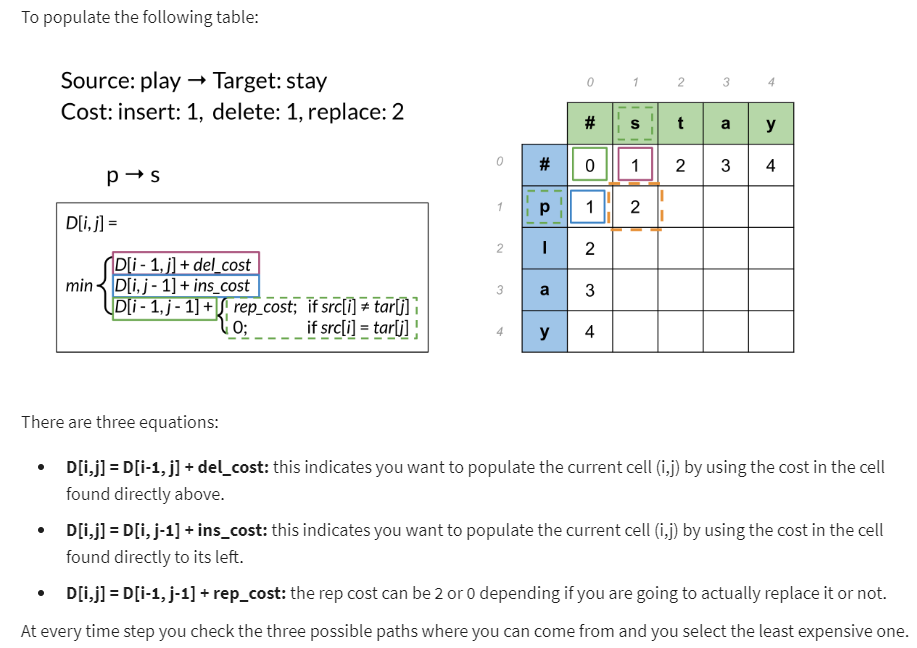

In [44]:
def min_edit_distance(source, target, ins_cost = 1, del_cost = 1, rep_cost = 2):
    '''
    Input: 
        source: a string corresponding to the string you are starting with
        target: a string corresponding to the string you want to end with
        ins_cost: an integer setting the insert cost
        del_cost: an integer setting the delete cost
        rep_cost: an integer setting the replace cost
    Output:
        D: a matrix of len(source)+1 by len(target)+1 containing minimum edit distances
        med: the minimum edit distance (med) required to convert the source string to the target
    '''
    # use deletion and insert cost as  1
    m = len(source) 
    n = len(target) 
    #initialize cost matrix with zeros and dimensions (m+1,n+1) 
    D = np.zeros((m+1, n+1), dtype=int) 
    
    ### START CODE HERE (Replace instances of 'None' with your code) ###
    
    # Fill in column 0, from row 1 to row m, both inclusive
    for row in range(0,m+1): # Replace None with the proper range
        D[row,0] = row*ins_cost
        
    # Fill in row 0, for all columns from 1 to n, both inclusive
    for col in range(0,n+1): # Replace None with the proper range
        D[0,col] = col*ins_cost
        
    # Loop through row 1 to row m, both inclusive
    for row in range(1,m+1):
        
        # Loop through column 1 to column n, both inclusive
        for col in range(1,n+1):
            
            # Intialize r_cost to the 'replace' cost that is passed into this function
            r_cost = rep_cost
            
            # Check to see if source character at the previous row
            # matches the target character at the previous column, 
            if source[row-1]==target[col-1]: # Replace None with a proper comparison
                # Update the replacement cost to 0 if source and target are the same
                r_cost = 0
                
            # Update the cost at row, col based on previous entries in the cost matrix
            # Refer to the equation calculate for D[i,j] (the minimum of three calculated costs)
            D[row,col] = min(D[row-1,col-1]+r_cost,D[row-1,col]+del_cost,D[row,col-1]+ins_cost)
            
    # Set the minimum edit distance with the cost found at row m, column n 
    med = D[m,n]
    
    ### END CODE HERE ###
    return D, med

In [45]:
source =  'play'
target = 'stay'
matrix, min_edits = min_edit_distance(source, target)
print("minimum edits: ",min_edits, "\n")
idx = list('#' + source)
cols = list('#' + target)
df = pd.DataFrame(matrix, index=idx, columns= cols)
print(df)

minimum edits:  4 

   #  s  t  a  y
#  0  1  2  3  4
p  1  2  3  4  5
l  2  3  4  5  6
a  3  4  5  4  5
y  4  5  6  5  4


# Complete Method

1. Set up Vocabulary
2. Get counts and probabilities of words in library
3. Set up edit one letter and two letter functions (Will require add, insert, replace, Switch functions)
4. Set up get_corrections function which will helps us get n best probable words from the suggestions
5. Set up min distance function and select the word with min distance

In [85]:
my_word = 'dys' 
tmp_corrections = get_corrections(my_word, probs, vocab, 2, verbose=True) # keep verbose=True
for i, word_prob in enumerate(tmp_corrections):
    print(f"word {i}: {word_prob[0]}, probability {word_prob[1]:.6f}")

    
# CODE REVIEW COMMENT: using "tmp_corrections" insteads of "cors". "cors" is not defined
print(f"data type of corrections {type(tmp_corrections)}")

entered word =  dys 
suggestions =  {'days', 'dye'}
word 0: days, probability 0.000410
word 1: dye, probability 0.000019
data type of corrections <class 'list'>


In [86]:
words = [word_tuples[0] for word_tuples in tmp_corrections]
source = my_word
suggestion = {}

for target in words:
    matrix, min_edits = min_edit_distance(source, target)
    suggestion.update({target : min_edits})
    print({target : min_edits})
suggestion = dict(sorted(suggestion.items(), key=lambda x: x[1]))
suggestion = list(suggestion.keys())[0]

{'days': 1}
{'dye': 2}


In [87]:
suggestion

'days'